## Aula 2

### Teoria da Busca - RPG Game (Cega e Heuristica)

teste


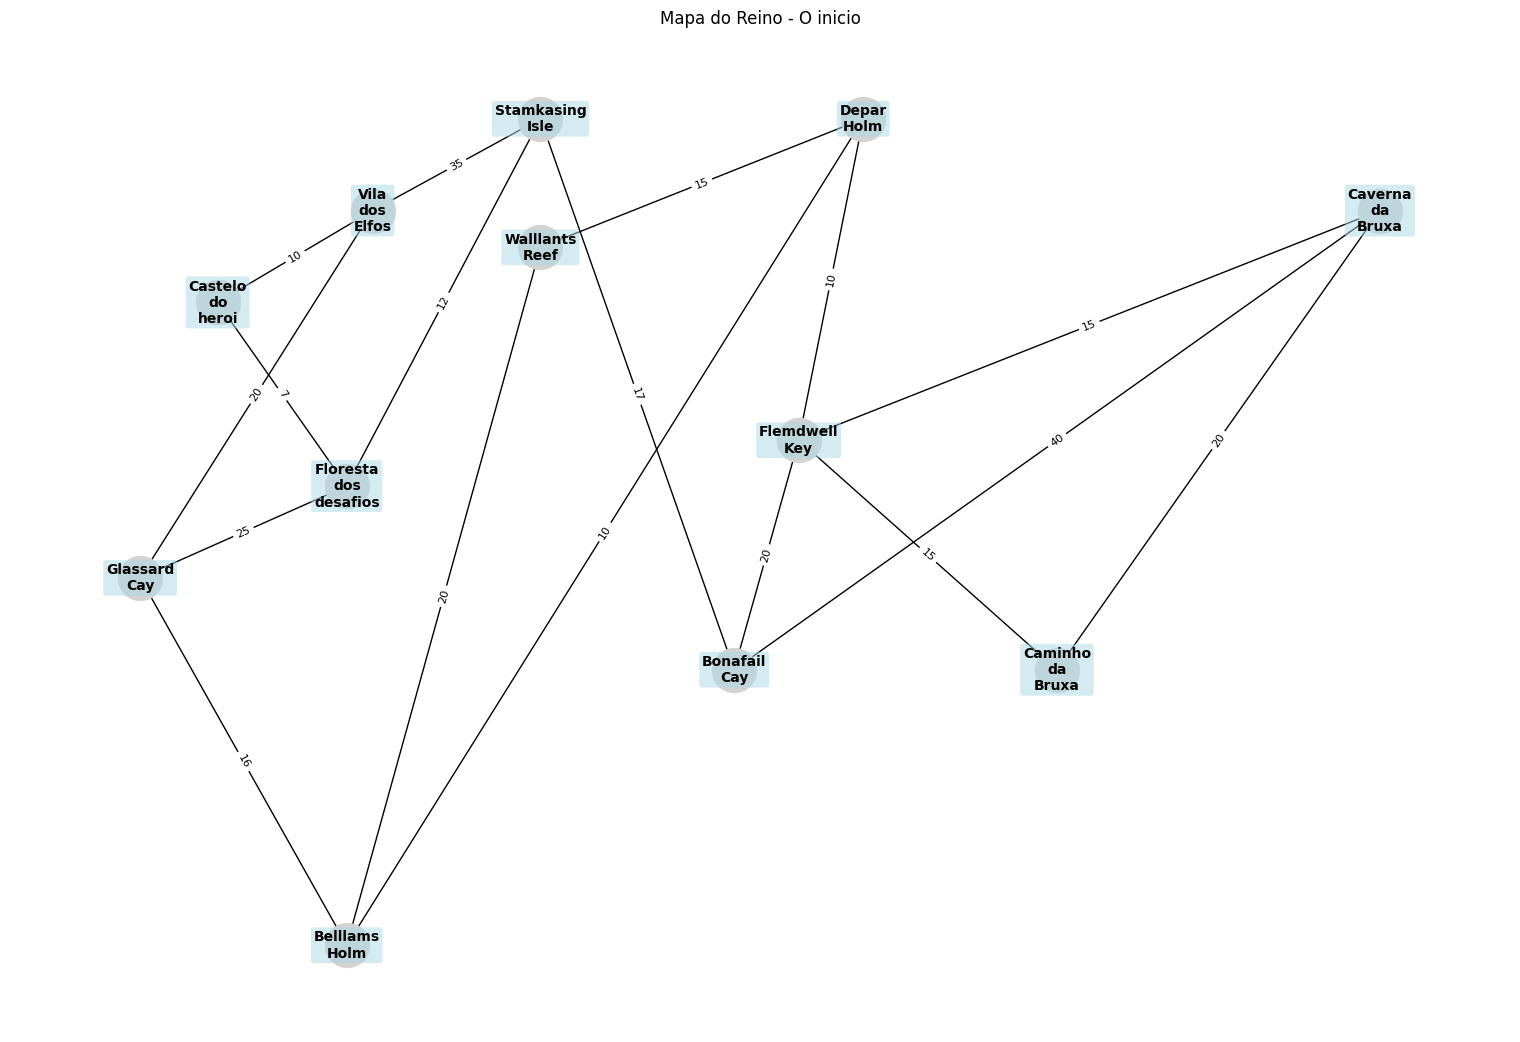

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import heapq

#Criar os grafos
G_game = nx.Graph()

# Criar o mapa
locais = {
    'Castelo do heroi': (50, 400),
    'Vila dos Elfos': (110, 450),
    'Floresta dos desafios': (100, 300),
    'Glassard Cay': (20, 250),
    'Stamkasing Isle': (175, 500),
    'Bonafail Cay': (250, 200),
    'Belllams Holm': (100, 50),
    'Walllants Reef': (175, 430),
    'Depar Holm': (300, 500),
    'Flemdwell Key': (275, 325),
    'Caminho da Bruxa': (375, 200),
    'Caverna da Bruxa': (500, 450),
}

# Conexões entre os nós (Arestas)
G_game.add_edge('Castelo do heroi', 'Vila dos Elfos', weight=10)
G_game.add_edge('Castelo do heroi', 'Floresta dos desafios', weight=7)
G_game.add_edge('Vila dos Elfos', 'Glassard Cay', weight=20)
G_game.add_edge('Floresta dos desafios', 'Glassard Cay', weight=25)
G_game.add_edge('Floresta dos desafios', 'Stamkasing Isle', weight=12)
G_game.add_edge('Stamkasing Isle', 'Bonafail Cay', weight=17)
G_game.add_edge('Stamkasing Isle', 'Vila dos Elfos', weight=35)
G_game.add_edge('Glassard Cay', 'Belllams Holm', weight=16)
G_game.add_edge('Belllams Holm', 'Walllants Reef', weight=20)
G_game.add_edge('Belllams Holm', 'Depar Holm', weight=10)
G_game.add_edge('Walllants Reef', 'Depar Holm', weight=15)
G_game.add_edge('Depar Holm', 'Flemdwell Key', weight=10)
G_game.add_edge('Flemdwell Key', 'Caminho da Bruxa', weight=15)
G_game.add_edge('Caminho da Bruxa', 'Caverna da Bruxa', weight=20)
G_game.add_edge('Bonafail Cay','Caverna da Bruxa', weight=40)
G_game.add_edge('Bonafail Cay','Flemdwell Key', weight=20)
G_game.add_edge('Flemdwell Key','Caverna da Bruxa', weight=15)

# Adicionando as posições nos eixos X e Y
for local, pos in locais.items():
    G_game.nodes[local]['pos'] = pos


# Função Plot Mapa
def plot_mapa(grafo, caminho_encontrado, titulo='Mapa do reino'):
    pos = nx.get_node_attributes(grafo, 'pos')
    pesos = nx.get_edge_attributes(grafo, 'weight')

    plt.figure(figsize=(15, 10))

    nx.draw(grafo, pos,
            with_labels=True,
            node_size=1000,
            node_color='lightgray',
            font_size=10,
            font_weight='bold',
            labels={node: node.replace(' ', '\n') for node in grafo.nodes()},
            bbox=dict(
                facecolor='lightblue',
                alpha=0.5,
                edgecolor='none',
                boxstyle='round,pad=0.2'
            ))
    nx.draw_networkx_edge_labels(grafo, pos, edge_labels=pesos, font_size=8, label_pos=0.5)

    if caminho_encontrado:
        caminho_arestas = list(zip(caminho_encontrado, caminho_encontrado[1:]))

        nx.draw_networkx_nodes(grafo, pos, nodelist=caminho_encontrado, node_color='red', node_size=500)
        nx.draw_networkx_edges(grafo, pos, edgelist=caminho_arestas, edge_color='red', node_size=500, width=3)

        nx.draw_networkx_nodes(grafo, pos, nodelist=[caminho_encontrado[0]], node_color='green', node_size=500, label="Inicio")
        nx.draw_networkx_nodes(grafo, pos, nodelist=[caminho_encontrado[-1]], node_color='purple', node_size=500, label="Objetivo")



        plt.text(pos[caminho_encontrado[0]][0], pos[caminho_encontrado[0]][1] + 30, 'Inicio', fontsize=12, ha='center', va='center', color='green')
        plt.text(pos[caminho_encontrado[-1]][0], pos[caminho_encontrado[-1]][1] + 30, 'Objetivo', fontsize=12, ha='center', va='center', color='purple')

    print('teste')
    plt.title(titulo)
    plt.axis('off')
    plt.show()

plot_mapa(G_game, [], titulo='Mapa do Reino - O inicio')

### Busca em Largura (BFS)

In [2]:
def bfs_game(grafo, inicio, objetivo):
    visitados = set()
    fila = deque([(inicio, [inicio], 0)])

    if inicio == objetivo:
        return [inicio], 0

    while fila:
        no_atual, caminho, custo_total = fila.popleft()

        if no_atual == objetivo:
            return caminho, custo_total

        if no_atual not in visitados:
            visitados.add(no_atual)
            for vizinho in grafo[no_atual]:
                if vizinho not in visitados:
                    novo_custo = custo_total + grafo[no_atual][vizinho]['weight']
                    novo_caminho = list(caminho)
                    novo_caminho.append(vizinho)
                    fila.append((vizinho, novo_caminho, novo_custo))
    return None